Data Preparation:

Obtain a dataset containing credit-related features and labels (e.g., whether a credit applicant is high risk or low risk).

Homomorphic Encryption:
Choose a suitable homomorphic encryption library. PySEAL is a popular choice for implementing homomorphic encryption in Python.

Autoencoder Design:
Design an autoencoder architecture for feature extraction. The autoencoder should take in encrypted credit-related features and produce an encoded representation.
You may need to design the autoencoder layers based on the specific features in your dataset.

Training:
Train the homomorphic autoencoder using encrypted credit data.
Ensure that the training process is privacy-preserving and that the model doesn't learn any sensitive information.

Credit Risk Identification:
Use the encoded representation of the data from the autoencoder to perform credit risk identification or classification.
This step typically involves training a classifier (e.g., logistic regression, neural network) on the encoded data to predict credit risk.

Decryption:
If necessary, you can decrypt the final classification results to obtain the credit risk labels while maintaining privacy.

Evaluation:
Evaluate the performance of your credit risk identification system using appropriate metrics (e.g., accuracy, precision, recall).

Privacy and Security Considerations:

Ensure that your homomorphic encryption setup is secure and follows best practices for preserving privacy.
Address any legal and compliance requirements related to handling sensitive financial data.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, Dropout
from keras.optimizers.legacy import Adam
from keras.layers import Input
from keras.models import Model

from sklearn import preprocessing
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
from sklearn.preprocessing import KBinsDiscretizer

# Create a label encoder
lb_encoder = LabelEncoder()

# Load the German credit card data
names = ['existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount', 
         'savings', 'employmentsince', 'installmentrate', 'statussex', 'otherdebtors', 
         'residencesince', 'property', 'age', 'otherinstallmentplans', 'housing', 
         'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker', 'classification']

data = pd.read_csv('german.data', names = names, delimiter=' ')

In [2]:
numeric_col = ["age","duration","creditamount"]
est = KBinsDiscretizer(n_bins=4, encode='ordinal', 
                       strategy='uniform')
for col in numeric_col:    
    data[col] = est.fit_transform(data[[col]])
num_col = ["duration","creditamount", "installmentrate", "residencesince", "age","existingcredits","peopleliable"]
for item in data.columns:
    if item not in num_col:
        print(item)
        data[item] = lb_encoder.fit_transform(data[item])   

existingchecking
credithistory
purpose
savings
employmentsince
statussex
otherdebtors
property
otherinstallmentplans
housing
job
telephone
foreignworker
classification


# APPROACH 1 - Simple Encoder without Encryption

In [3]:
data.head()

,existingchecking,duration,credithistory,purpose,creditamount,savings,employmentsince,installmentrate,statussex,otherdebtors,...,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker,classification
0,0,0.0,4,4,0.0,4,4,4,2,0,...,0,3.0,2,1,2,2,1,1,0,0
1,1,2.0,2,4,1.0,0,2,2,1,0,...,0,0.0,2,1,1,2,1,0,0,1
2,3,0.0,4,7,0.0,0,3,2,2,0,...,0,2.0,2,1,1,1,2,0,0,0
3,0,2.0,2,3,1.0,0,3,2,2,2,...,1,1.0,2,2,1,2,2,0,0,0
4,0,1.0,3,0,1.0,0,2,3,2,0,...,3,2.0,2,2,2,2,2,0,0,1


In [4]:
data
X = data[['existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount', 
         'savings', 'employmentsince', 'installmentrate', 'statussex', 'otherdebtors', 
         'residencesince', 'property', 'age', 'otherinstallmentplans', 'housing', 
         'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker']]
Y = data["classification"]

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

# Create the encoder
encoder = Sequential()
encoder.add(Dense(128, activation="relu"))
encoder.add(Dense(64, activation="relu"))
encoder.add(Dense(32, activation="relu"))
encoder.add(Dense(16, activation="relu"))
encoder.add(Dense(8, activation="relu"))
encoder.add(Dense(1, activation="sigmoid"))

# Compile the encoder
encoder.compile(optimizer="adam", loss="binary_crossentropy")

# Train the encoder
encoder.fit(X_train, y_train, epochs=100)

In [6]:
encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (32, 128)                 2688      
                                                                 
 dense_1 (Dense)             (32, 64)                  8256      
                                                                 
 dense_2 (Dense)             (32, 32)                  2080      
                                                                 
 dense_3 (Dense)             (32, 16)                  528       
                                                                 
 dense_4 (Dense)             (32, 8)                   136       
                                                                 
 dense_5 (Dense)             (32, 1)                   9         
                                                                 
Total params: 13697 (53.50 KB)
Trainable params: 13697 (

In [7]:
# Calculate the accuracy of the encoder on the test data
y_pred = (encoder.predict_on_batch(X_test) >= 0.5).astype(int)

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

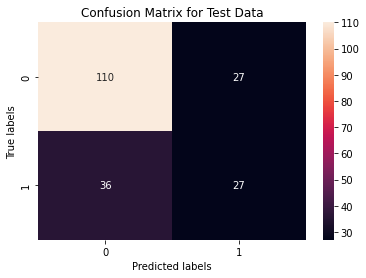

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as pt
import seaborn as sbn

con_mat = confusion_matrix(y_test, y_pred)
ax= pt.subplot()
sbn.heatmap(con_mat, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Test Data')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.80      0.78       137
           1       0.50      0.43      0.46        63

    accuracy                           0.69       200
   macro avg       0.63      0.62      0.62       200
weighted avg       0.67      0.69      0.68       200



# Encryption

In [10]:
import torch, os
import tenseal as ts
import torch.nn as nn
import torch.optim as optim

In [11]:
salt = os.urandom(16)
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.kdf.pbkdf2 import PBKDF2HMAC
from base64 import urlsafe_b64encode, urlsafe_b64decode

def encrypt_deterministic(key, plaintext):
    cipher = Cipher(algorithms.AES(key), modes.ECB(), backend=default_backend())
    encryptor = cipher.encryptor()
    data_to_encrypt = str(plaintext).encode()
    padded_plaintext = data_to_encrypt.ljust(16) # Pad to block size (16 bytes for AES)
    ciphertext = encryptor.update(padded_plaintext) + encryptor.finalize()
    return urlsafe_b64encode(ciphertext)

def decrypt_deterministic(key, ciphertext):
    cipher = Cipher(algorithms.AES(key), modes.ECB(), backend=default_backend())
    decryptor = cipher.decryptor()
    decrypted = decryptor.update(urlsafe_b64decode(ciphertext)) + decryptor.finalize()
    return decrypted.rstrip(b'\0') # Remove padding

# Generate a proper AES key using PBKDF2
password = b'password'
salt = salt
kdf = PBKDF2HMAC(
algorithm=hashes.SHA256(),
iterations=100000,
salt=salt,
    length=32, # Key size for AES-256
    backend=default_backend()
    )
key = kdf.derive(password)

In [12]:
#batch the data
batch_size = 50
num_batches = len(data) // batch_size

In [13]:
X = data[['existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount', 
         'savings', 'employmentsince', 'installmentrate', 'statussex', 'otherdebtors', 
         'residencesince', 'property', 'age', 'otherinstallmentplans', 'housing', 
         'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker']]
Y = data["classification"]

encrypted_df = X.apply(lambda x: x.apply(lambda y: encrypt_deterministic(key, y)))
X_hot = pd.get_dummies(encrypted_df, columns=encrypted_df.columns)
encrypted_df_hot = X_hot.copy()
encrypted_df_hot["classification"] = Y
       
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_hot,Y, test_size=0.2)

In [55]:
data.shape

(1000, 80)

In [14]:
#batch the data
batch_size = 50
num_batches = len(encrypted_df_hot) / batch_size
encrypted_batches = [encrypted_df_hot[i:i + batch_size] for i in range(0,len(encrypted_df_hot), batch_size)]
tot_columns = encrypted_df_hot.shape[1]
print(tot_columns)

81


In [15]:
# #batch the data
# batch_size = 50
# num_batches = len(encrypted_df_hot) / batch_size
# encrypted_batches = [X_train[i:i + batch_size] for i in range(0,len(X_train), batch_size)]
# tot_columns = X_train.shape[1]
# print(tot_columns)

In [17]:
#Define Generator
def create_generator():
    generator = Sequential()
    generator.add(Dense(units=256, input_dim=encrypted_df_hot.shape[1]))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=512))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=1024))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=encrypted_df_hot.shape[1], activation='sigmoid'))
    
    generator.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))
    return generator

#Define discriminator
def create_discriminator():
    discriminator = Sequential()
    discriminator.add(Dense(units=256, input_dim=encrypted_df_hot.shape[1]))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
    
    discriminator.add(Dense(units=512))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
    
    discriminator.add(Dense(units=256))
    discriminator.add(LeakyReLU(0.2))
    
    discriminator.add(Dense(units=encrypted_df_hot.shape[1], activation='sigmoid'))
    
    discriminator.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))
    return discriminator

# create GAN
def create_gan(discriminator, generator):
    discriminator.trainable = False
    gan_input = Input(shape=(encrypted_df_hot.shape[1],))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss= 'binary_crossentropy', optimizer='adam', metrics='accuracy')
    gan.summary()
    return gan

#define GAN model
def train_gan(gan, generator, discriminator, epochs=1, batch_size=50):
    
    for e in range(epochs):
        print("In epoch :::::::::::::::::::::::::::::::::::::::::::::::::: ", e)
        i=0
        for batch in encrypted_batches:
            i = i +1
            #print("In batch no :::::::::::::::::::::::::::::::::::::::::::::::::: ", i)
            noise = np.random.normal(0,1,[batch_size,tot_columns])
            generated_data = generator.predict(noise)
            #print(noise.shape)
            real_data = batch
            #real_data = np.stack(real_data, axis=0)
            discriminator.trainable = True
            real_loss= discriminator.train_on_batch(real_data,np.ones((batch_size,tot_columns)))#Compute the discriminator's loss on real data
            fake_loss= discriminator.train_on_batch(generated_data,np.zeros((batch_size,tot_columns))) #Compute the discriminator's loss on fake data
            #print("real_loss : ", real_loss)
            #print("fake_loss : ", fake_loss)
            
            discriminator.trainable = False #Don't change discriminator weights
            loss, accuracy = gan.train_on_batch(noise, np.ones((batch_size,tot_columns)))
            #loss, accuracy = gan.train_on_batch(X_test, y_test)
        print('GAN Loss: ',loss)
        #print('Accuracy: ',accuracy)

In [ ]:
#create the models
generator = create_generator()
discriminator = create_discriminator()
#train GAN model
gan = create_gan(discriminator, generator)
train_gan(gan,generator, discriminator)

In [19]:
# Model.test_on_batch(
#     x, y=None, sample_weight=None, reset_metrics=True, return_dict=False
# )

#gan.test_on_batch(x=X_test, y=y_test)

In [20]:
#Model.predict_on_batch(x)

In [73]:
generated_gan_data = gan.predict_on_batch(encrypted_df_hot)

### Save the model

In [21]:
gan.save('gan.h5')

C:\Users\chanc\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Set up a server

In [22]:
from flask import Flask
app = Flask(__name__)

### Load the model

In [23]:
from keras.models import load_model
import tensorflow.compat.v1 as tff
tff.get_default_graph()

PyGraph<2077103679232>

In [24]:
#global model
gan = load_model('gan.h5')
#global graph
#graph = tff.get_default_graph()

### Create an API endpoint

In [47]:
from flask import request, jsonify

@app.route('/predictData', methods = ['POST'])
def predictData111111():
    print("called predictData")
    input_data = request.get_json().get('data')
    print('input_data : ', input_data)
    predict_data = [input_data['existingchecking'], 
                    input_data['duration'], 
                    input_data['credithistory'], 
                    input_data['purpose'], 
                    input_data['creditamount'], 
                    input_data['savings'], 
                    input_data['employmentsince'], 
                    input_data['installmentrate'], 
                    input_data['statussex'], 
                    input_data['otherdebtors'], 
                    input_data['residencesince'], 
                    input_data['property'], 
                    input_data['age'], 
                    input_data['otherinstallmentplans'], 
                    input_data['housing'], 
                    input_data['existingcredits'], 
                    input_data['job'], 
                    input_data['peopleliable'], 
                    input_data['telephone'], 
                    input_data['foreignworker']]
    predict_data = np.array(predict_data).reshape(1,-1)
    # with graph.as_default():
    # generated_data = model.predict(predict_data)
    print('predict_data: ',predict_data)
    #generated_data = gan.predict(predict_data)
    #return jsonify(generated_data.tolist())
    return 'hello'

### Run the server

In [48]:
if __name__ =='__main__':
    app.run(debug=False, port=8049, use_reloader=False)

127.0.0.1 - - [30/Sep/2023 12:42:58] "POST /predictData HTTP/1.1" 200 -


input_data :  {'existingchecking': 'A11', 'duration': '6', 'credithistory': 'A34', 'purpose': 'A43', 'creditamount': '1169', 'savings': 'A65', 'employmentsince': 'A75', 'installmentrate': '4', 'statussex': 'A93', 'otherdebtors': 'A101', 'residencesince': '4', 'property': 'A121', 'age': '67', 'otherinstallmentplans': 'A143', 'housing': 'A152', 'existingcredits': '2', 'job': 'A173', 'peopleliable': '1', 'telephone': 'A192', 'foreignworker': 'A201'}
predict_data:  [['A11' '6' 'A34' 'A43' '1169' 'A65' 'A75' '4' 'A93' 'A101' '4' 'A121'
  '67' 'A143' 'A152' '2' 'A173' '1' 'A192' 'A201']]


### Send requests to API--> http://localhost:8049/predict

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the neural network
class BinaryClassifier(nn.Module):
    def __init__(self, in_columns):
        super(BinaryClassifier, self).__init__()
        self.layer1 = nn.Linear(in_columns, 128, bias=True)
        self.layer2 = nn.Linear(128, 1024, bias=True)
        self.layer3 = nn.Linear(1024, 512, bias=True)
        self.layer4 = nn.Linear(512, 1, bias=True)
        

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = torch.sigmoid(self.layer4(x))
        return x

# Create an instance of the model
model = BinaryClassifier(X_train.shape[1])

# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 1000

for epoch in range(epochs):
    # Forward pass
    y_pred = model(torch.tensor(X_train.values, dtype=torch.float32))
    
    # Modify the target tensor
    y_train_tn = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

    # Calculate the loss
    loss = criterion(y_pred, y_train_tn)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item()}')

# Test the model
with torch.no_grad():
    y_pred = model(torch.tensor(X_test.values, dtype=torch.float32))
    y_pred_binary = (y_pred >= y_pred.mean()).int()

print("Predictions:", y_pred_binary[0])

In [86]:
import torch

# Load the model architecture (make sure MyModel is defined)
#from credit_risk_classifier import BinaryClassifier

# Specify the path to the saved model
#model_path = 'credit_risk_classifier.pth'

# Create an instance of the model
mod = BinaryClassifier(80)

# Load the model's parameters
mod.load_state_dict(torch.load(model_path))
mod.eval()  # Set the model to evaluation mode

<All keys matched successfully>

In [87]:
mod.eval()  # Set the model to evaluation mode

BinaryClassifier(
  (layer1): Linear(in_features=80, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=1024, bias=True)
  (layer3): Linear(in_features=1024, out_features=512, bias=True)
  (layer4): Linear(in_features=512, out_features=1, bias=True)
)

In [92]:
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/predictCreditRisk', methods=['POST'])
def predict():
    try:
        print('Called predictCreditRisk')
        # Get the input data from the request
        input_data = request.get_json(force=True)        
        y_pred = mod(torch.tensor(X_test.values, dtype=torch.float32))
        y_pred_binary = (y_pred >= y_pred.mean()).int()
        print(y_pred_binary)
        return 'hello_hello'
    except Exception as e:
        return jsonify({'error': str(e)})

In [93]:
if __name__ =='__main__':
    app.run(debug=False, port=8049, use_reloader=False)

In [94]:
X_test

,existingchecking_b'1RY_hjciyWrl44HzGRJMig==',existingchecking_b'dpF4nHQuEbxoeTljaU0Bzg==',existingchecking_b'fAvQ9004OFz-03WVLtpKSg==',existingchecking_b'y6w8UQBBdWP-ptOgJ0Ni4w==',duration_b'GE8h-HbkWi-vxfBJ_jgzcA==',duration_b'KHmDeqvLeRB-LPkInbkVOg==',duration_b'V3e5kX3XjTb0sazVUs4WGg==',duration_b'zf8fneFnE76YwPf-cjTI9w==',credithistory_b'1RY_hjciyWrl44HzGRJMig==',credithistory_b'dpF4nHQuEbxoeTljaU0Bzg==',...,job_b'1RY_hjciyWrl44HzGRJMig==',job_b'dpF4nHQuEbxoeTljaU0Bzg==',job_b'fAvQ9004OFz-03WVLtpKSg==',job_b'y6w8UQBBdWP-ptOgJ0Ni4w==',peopleliable_b'1RY_hjciyWrl44HzGRJMig==',peopleliable_b'fAvQ9004OFz-03WVLtpKSg==',telephone_b'dpF4nHQuEbxoeTljaU0Bzg==',telephone_b'fAvQ9004OFz-03WVLtpKSg==',foreignworker_b'dpF4nHQuEbxoeTljaU0Bzg==',foreignworker_b'fAvQ9004OFz-03WVLtpKSg=='
229,0,1,0,0,0,0,0,1,1,0,...,1,0,0,0,0,1,1,0,1,0
170,0,1,0,0,1,0,0,0,0,1,...,1,0,0,0,1,0,1,0,1,0
471,0,1,0,0,1,0,0,0,1,0,...,1,0,0,0,0,1,1,0,1,0
900,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
35,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,1,0
461,0,1,0,0,1,0,0,0,1,0,...,1,0,0,0,0,1,1,0,1,0
991,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
177,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,1,0,1,0
